In [2]:
import numpy as np
import pandas as pd

# NumPyの表示設定
np.set_printoptions(precision=3, suppress=True)

# Pandasの表示設定
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')
df.rename(columns={'英語': 'en', '数学': 'ma'}, inplace=True)
df.rename_axis('sid', inplace=True)
print(df.head())
english_scores = np.array(df['en'])

     en  ma
sid        
1    42  65
2    69  80
3    56  63
4    41  63
5    57  76


In [3]:
df

,en,ma
sid,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [4]:
scores = np.array(df['en'])

In [5]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [6]:
sum(scores)

2919

In [7]:
len(scores)

50

In [8]:
sum(scores) / len(scores)

58.38

In [9]:
np.mean(scores)

58.38

In [10]:
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79])

In [11]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]

median

57.5

In [12]:
np.median(scores)

57.5

In [13]:
pd.Series(scores).mode()

0    57
dtype: int64

In [14]:
pd.Series(scores).value_counts(dropna=False).head(5)

57    5
65    4
54    3
62    3
55    3
Name: count, dtype: int64

# 偏差

In [15]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-16.38,  10.62,  -2.38, -17.38,  -1.38, -10.38,   6.62,  -9.38,
         6.62,  -0.38,  11.62, -11.38,  -7.38,   5.62,   3.62,  11.62,
        12.62,   9.62,  14.62, -21.38,   6.62,   6.62,   2.62,  -6.38,
        -1.38,  -1.38,  16.62,   2.62, -11.38,  -4.38,   7.62,  -4.38,
        -4.38, -16.38, -21.38,  20.62,  -2.38,   3.62,   3.62,  -3.38,
         4.62,  -1.38,  -1.38,   8.62,  -3.38, -13.38,   7.62,  -3.38,
         5.62,   7.62])

In [16]:
np.mean(deviation)

-2.5579538487363606e-15

In [17]:
df = pd.DataFrame({'scores': scores})

In [18]:
df['deviation'] = deviation
df.head(10)

,scores,deviation
0,42,-16.38000
1,69,10.62000
2,56,-2.38000
3,41,-17.38000
4,57,-1.38000
5,48,-10.38000
6,65,6.62000
7,49,-9.38000
8,65,6.62000
9,58,-0.38000


In [19]:
df.mean()

scores      58.38000
deviation   -0.00000
dtype: float64

# Variance　分散

In [20]:
np.mean(deviation ** 2)

94.1156

In [21]:
np.var(scores, ddof=1)

96.03632653061224

In [22]:
df['squared_diviation'] = np.square(deviation)
df['variance'] = np.var(scores)
df.head()

,scores,deviation,squared_diviation,variance
0,42,-16.38000,268.30440,94.11560
1,69,10.62000,112.78440,94.11560
2,56,-2.38000,5.66440,94.11560
3,41,-17.38000,302.06440,94.11560
4,57,-1.38000,1.90440,94.11560


In [23]:
df.mean()

scores              58.38000
deviation           -0.00000
squared_diviation   94.11560
variance            94.11560
dtype: float64

In [24]:
standard_deviation = np.sqrt(np.var(scores, ddof=0))
standard_deviation

9.70131949788275

In [25]:
df['standard_deviation'] = standard_deviation
df.head()

,scores,deviation,squared_diviation,variance,standard_deviation
0,42,-16.38000,268.30440,94.11560,9.70132
1,69,10.62000,112.78440,94.11560,9.70132
2,56,-2.38000,5.66440,94.11560,9.70132
3,41,-17.38000,302.06440,94.11560,9.70132
4,57,-1.38000,1.90440,94.11560,9.70132


In [26]:
np.std(scores, ddof=0)

9.70131949788275

In [27]:
np.max(scores) - np.min(scores)

42

In [28]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR



11.0

In [29]:
np.percentile(scores, 50)

57.5

In [30]:
pd.Series(scores).describe()

count   50.00000
mean    58.38000
std      9.79981
min     37.00000
25%     54.00000
50%     57.50000
75%     65.00000
max     79.00000
dtype: float64

# Zスコア
データから平均を引き、標準偏差で割る操作を標準化standardizationという。標準化されたデータを、基準か変量standardized dataやZスコアz-scoreという。

In [31]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.688,  1.095, -0.245, -1.792, -0.142, -1.07 ,  0.682, -0.967,
        0.682, -0.039,  1.198, -1.173, -0.761,  0.579,  0.373,  1.198,
        1.301,  0.992,  1.507, -2.204,  0.682,  0.682,  0.27 , -0.658,
       -0.142, -0.142,  1.713,  0.27 , -1.173, -0.451,  0.785, -0.451,
       -0.451, -1.688, -2.204,  2.125, -0.245,  0.373,  0.373, -0.348,
        0.476, -0.142, -0.142,  0.889, -0.348, -1.379,  0.785, -0.348,
        0.579,  0.785])

In [32]:
df['z_score'] = z

In [33]:
df.head()

,scores,deviation,squared_diviation,variance,standard_deviation,z_score
0,42,-16.38000,268.30440,94.11560,9.70132,-1.68843
1,69,10.62000,112.78440,94.11560,9.70132,1.09470
2,56,-2.38000,5.66440,94.11560,9.70132,-0.24533
3,41,-17.38000,302.06440,94.11560,9.70132,-1.79151
4,57,-1.38000,1.90440,94.11560,9.70132,-0.14225


In [34]:
np.mean(z), np.std(z, ddof=0)

(-2.4424906541753446e-16, 1.0)

In [35]:
deviation_scores = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
deviation_scores

array([33.116, 60.947, 47.547, 32.085, 48.578, 39.3  , 56.824, 40.331,
       56.824, 49.608, 61.978, 38.27 , 42.393, 55.793, 53.731, 61.978,
       63.009, 59.916, 65.07 , 27.962, 56.824, 56.824, 52.701, 43.424,
       48.578, 48.578, 67.132, 52.701, 38.27 , 45.485, 57.855, 45.485,
       45.485, 33.116, 27.962, 71.255, 47.547, 53.731, 53.731, 46.516,
       54.762, 48.578, 48.578, 58.885, 46.516, 36.208, 57.855, 46.516,
       55.793, 57.855])

In [36]:
df['deviation_score'] = deviation_scores

In [37]:
df.head()

,scores,deviation,squared_diviation,variance,standard_deviation,z_score,deviation_score
0,42,-16.38000,268.30440,94.11560,9.70132,-1.68843,33.11570
1,69,10.62000,112.78440,94.11560,9.70132,1.09470,60.94696
2,56,-2.38000,5.66440,94.11560,9.70132,-0.24533,47.54673
3,41,-17.38000,302.06440,94.11560,9.70132,-1.79151,32.08491
4,57,-1.38000,1.90440,94.11560,9.70132,-0.14225,48.57751


# 度数分布表
- 階級class　１０点から２０点などの区間のこと
- 度数frequency その階級に分布している値の数のこと
- 階級幅 binのことかな
  

In [38]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [39]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_class
freq_dist_df = pd.DataFrame(
    {'frequency': freq},
    index=pd.Index(freq_class, name='class')
  
)
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [40]:
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [41]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

### 相対度数
全データに対してその階級のデータがどれぐらいの割合を占めているかを示す

### 累積早退度数
その階級までの相対度数の和を示す。

In [42]:
rel_freq = freq_dist_df / freq.sum()
rel_freq

,frequency
class,
0~10,0.00000
10~20,0.00000
20~30,0.00000
30~40,0.04000
40~50,0.16000
50~60,0.32000
60~70,0.36000
70~80,0.12000
80~90,0.00000


In [44]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

,frequency
class,
0~10,0.00000
10~20,0.00000
20~30,0.00000
30~40,0.04000
40~50,0.20000
50~60,0.52000
60~70,0.88000
70~80,1.00000
80~90,1.00000


In [47]:
freq_dist_df['class_value'] = class_value
freq_dist_df['rel_freq'] = rel_freq
freq_dist_df['cum_rel_freq'] = cum_rel_freq
freq_dist_df['class value'] = class_value
freq_dist_df = freq_dist_df[['class_value', 'frequency', 'rel_freq', 'cum_rel_freq']]
freq_dist_df

,class_value,frequency,rel_freq,cum_rel_freq
class,,,,
0~10,5,0,0.00000,0.00000
10~20,15,0,0.00000,0.00000
20~30,25,0,0.00000,0.00000
30~40,35,2,0.04000,0.04000
40~50,45,8,0.16000,0.20000
50~60,55,16,0.32000,0.52000
60~70,65,18,0.36000,0.88000
70~80,75,6,0.12000,1.00000
80~90,85,0,0.00000,1.00000


In [51]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class_value']

65

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

Text(0, 0.5, 'number of people')

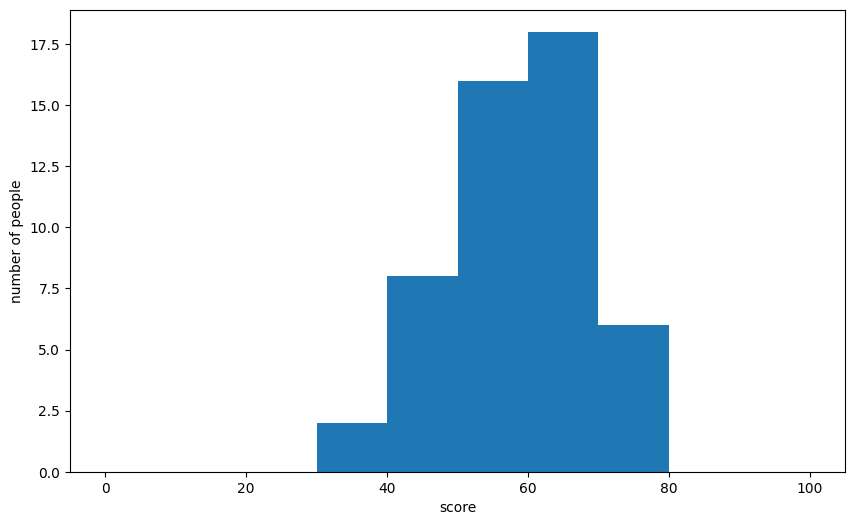

In [71]:
# Creating canvas
fig = plt.figure(figsize=(10, 6))
# キャンバス上にグラフを作るための領域を作る
# 引数は領域を1X1個作り、一つ目の領域に描画することを意味する
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# Adding label to X axis 
ax.set_xlabel('score')
ax.set_ylabel('number of people')
# ax.set_xticks(np.linspace(0, 100, 10+1))

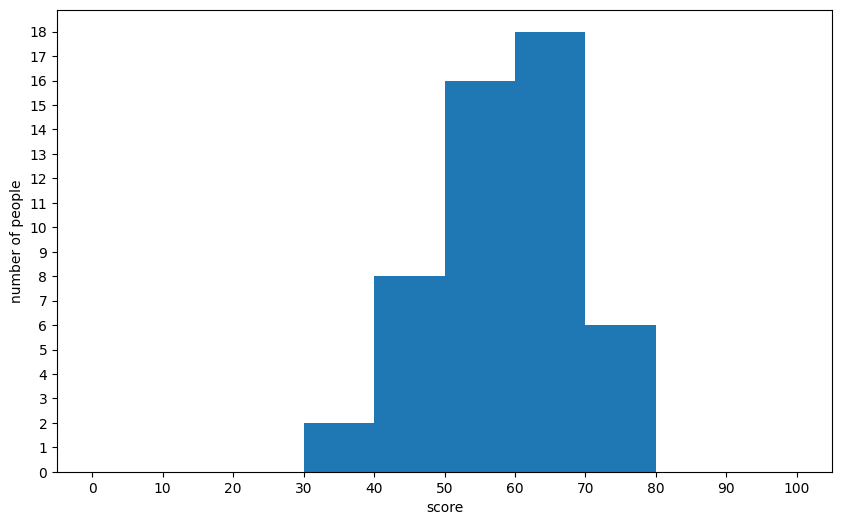

In [87]:
# Creating canvas
fig = plt.figure(figsize=(10, 6))
# キャンバス上にグラフを作るための領域を作る
# 引数は領域を1X1個作り、一つ目の領域に描画することを意味する
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# Adding label to X axis 
ax.set_xlabel('score')
ax.set_ylabel('number of people')
ax.set_xticks(np.linspace(0, 100, 10+1))
# +1をしているのは、np.arangeの場合は0始まりだから、maxよりも一つ少ない値までの数値が作られる。だから+1をしている。
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

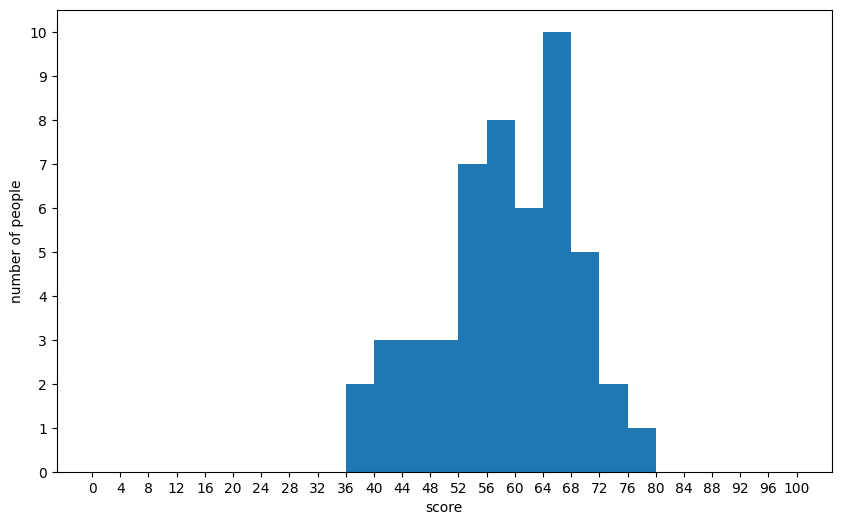

In [89]:
# Creating canvas
fig = plt.figure(figsize=(10, 6))
# キャンバス上にグラフを作るための領域を作る
# 引数は領域を1X1個作り、一つ目の領域に描画することを意味する
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
# Adding label to X axis 
ax.set_xlabel('score')
ax.set_ylabel('number of people')
ax.set_xticks(np.linspace(0, 100, 25+1))
# +1をしているのは、np.arangeの場合は0始まりだから、maxよりも一つ少ない値までの数値が作られる。だから+1をしている。
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

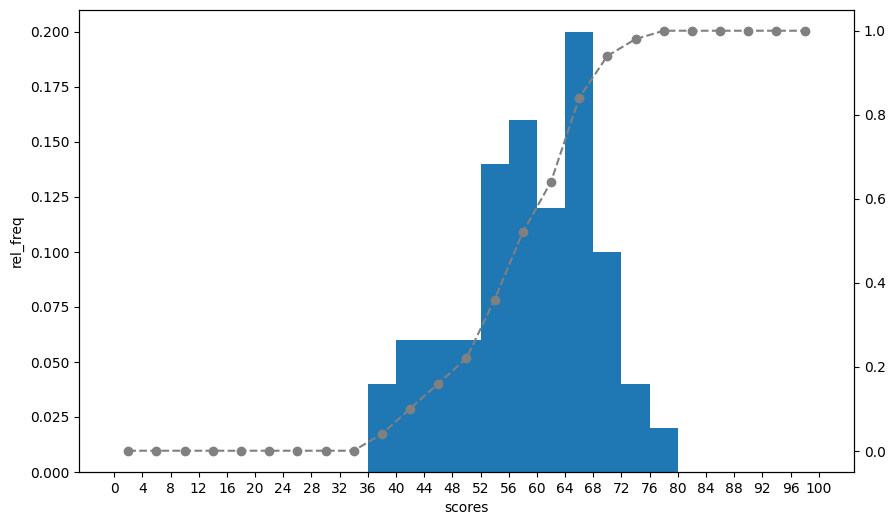

In [96]:
# Creating canvas
fig = plt.figure(figsize=(10, 6))
# キャンバス上にグラフを作るための領域を作る
# 引数は領域を1X1個作り、一つ目の領域に描画することを意味する
ax1 = fig.add_subplot(111)

# Y軸のスケールが違うグラフをax1と同じ領域上に描けるようにする
ax2 = ax1.twinx()
# 相対度数のヒストグラムにするためには、度数をデータの数で割る必要がある
# histの引数weightを指定することで実現できる。
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='grey')
ax2.grid(visible=False)

ax1.set_xlabel('scores')
ax1.set_ylabel('rel_freq')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()


### 箱ひげ図
データのばらつきを表現するための図。データの分布や外れ値を感覚的に掴むことができる。

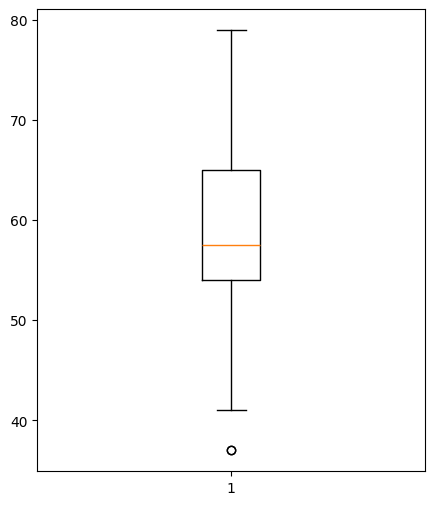

In [98]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, label='English')

plt.show()